# Customer Churn Prediction

- churn - defined as dropping out, leaving a company
- churn prediction tries to predict which customers are likely to leave the company/ unsubscribe from the service soon 
- this helps the compny lay out plans on how to retain the customers.

> Dataset 

- Telco customer churn data from [kaggle](https://www.kaggle.com/code/mahmoudhamedmohey/telecom-customer/data)
- There's one target variable returhning a yes/no or 1/0 making this a binary classification problem.

> Project process

- Exploratory Data Analysis (EDA)
- Data preprocessing
- Model creation and evaluation
- Model improvement

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('../data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

In [6]:
# Check for missing values
data.isna().sum().sum()

0

There are no missing values in the dataset

In [12]:
print(" The shape of the data is: ", data.shape)
print("The columns in the dataset are: ", data.columns)

 The shape of the data is:  (7043, 21)
The columns in the dataset are:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


The data is made up of 7043 rows and 21 columns.

In [13]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- This indicates an imbalanced class distribution. Churn = Yes is lower compare to churn = No.
- This is likely to impact the perfomace of a machine learnign model negatilvey.
- solutions incldue downsampling or upsampling as a emthod to overcome the problem.

In [14]:
# checking binary columns in the dataset
columns = data.columns
binary_cols = []

for col in columns:
    if data[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

- The above list contains columns that have a binary value.
- The remaining categorical variables all have more than 2 values/ classes

In [18]:
# multiple class features
multiple_class_cols = ['tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 
       'MonthlyCharges', 'TotalCharges']

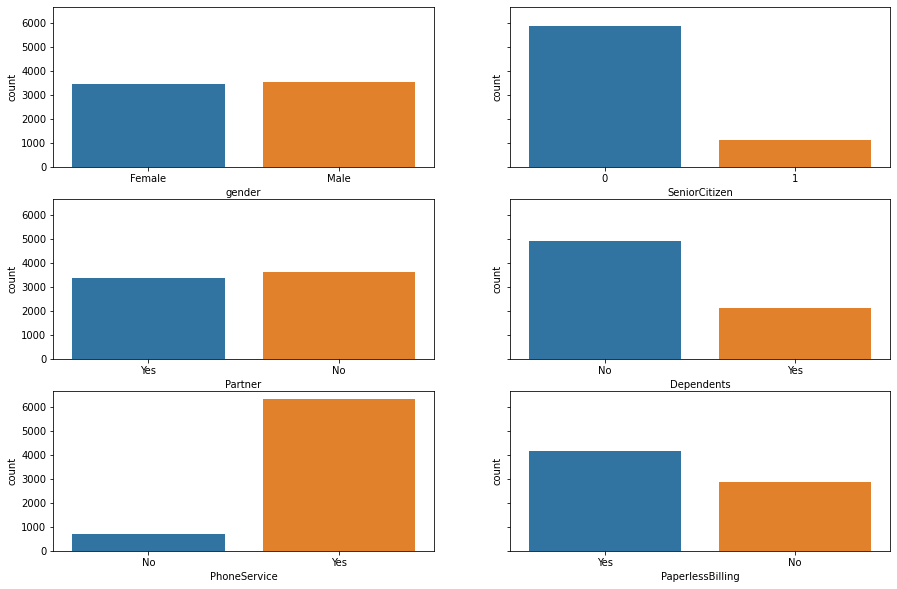

In [38]:
# Class distribution on the binary features
fig, axes = plt.subplots(3, 2, figsize = (15, 10), sharey=True)

sns.countplot(data = data, x='gender', ax=axes[0,0])
sns.countplot(data = data, x='SeniorCitizen', ax=axes[0,1])
sns.countplot(data = data, x='Partner', ax=axes[1,0])
sns.countplot(data = data, x='Dependents', ax=axes[1,1])
sns.countplot(data = data, x='PhoneService', ax=axes[2,0])
sns.countplot(data = data, x='PaperlessBilling', ax=axes[2,1]);

- There's notable imbalanced data in Dependents, Senior citizens adn phone services.
- A majority fo customers ahve a phone service compared to those without, most of them are not Senior citizens and a large number of them are not dependents